# 0. ==> Cat
# 1. ==> Dog

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dipanjanpathak","key":"ce95a59e33d02c96eebab771540b9907"}'}

In [6]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [26]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile

# Path to the downloaded zip file
zip_file_path = "dogs-vs-cats.zip"

# Extract the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('./dogs_vs_cats')

# Check the contents
import os
print(os.listdir('./dogs_vs_cats'))


['train', 'test', 'dogs_vs_cats']


In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
import cv2
import matplotlib.pyplot as plt


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)



validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:


# Creating CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten the 3D output to 1D
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 78ms/step - accuracy: 0.5783 - loss: 0.7178 - val_accuracy: 0.7162 - val_loss: 0.5522
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7191 - loss: 0.5426 - val_accuracy: 0.7780 - val_loss: 0.4768
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.7964 - loss: 0.4334 - val_accuracy: 0.7958 - val_loss: 0.4518
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8619 - loss: 0.3164 - val_accuracy: 0.7958 - val_loss: 0.5687
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.9288 - loss: 0.1782 - val_accuracy: 0.7952 - val_loss: 0.6990
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.9618 - loss: 0.1010 - val_accuracy: 0.7838 - val_loss: 0.9528
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.9745 - loss: 0.0719 - val_accuracy: 0.7898 - val_loss: 1.0797
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - accuracy: 0.9805 - loss: 0.0585 - 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

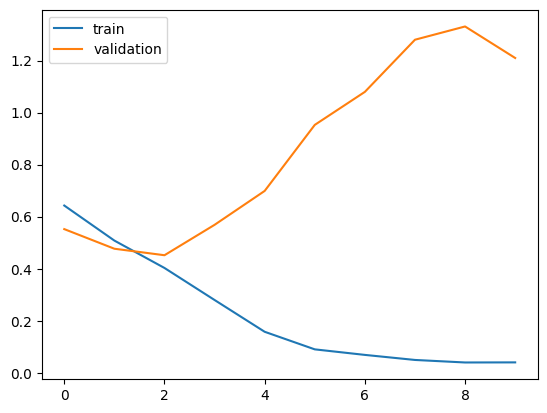

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

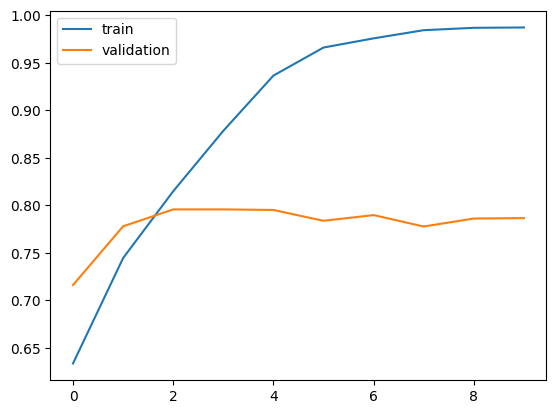

In [ ]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.legend()
plt.show()

Its overfitting...so we will try batch normalization, dropouts etc.

In [ ]:


# Creating CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten the 3D output to 1D
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 80ms/step - accuracy: 0.5369 - loss: 2.5256 - val_accuracy: 0.5114 - val_loss: 0.6860
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 78ms/step - accuracy: 0.5528 - loss: 0.6999 - val_accuracy: 0.6162 - val_loss: 0.6668
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.5842 - loss: 0.6702 - val_accuracy: 0.5898 - val_loss: 0.6573
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 78ms/step - accuracy: 0.6422 - loss: 0.6354 - val_accuracy: 0.6870 - val_loss: 0.6001
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 85ms/step - accuracy: 0.6698 - loss: 0.6088 - val_accuracy: 0.6868 - val_loss: 0.5807
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.7031 - loss: 0.5746 - val_accuracy: 0.7528 - val_loss: 0.5250
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7208 - loss: 0.5568 - val_accuracy: 0.6902 - val_loss: 0.6689
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7490 - loss: 0.5239 - 

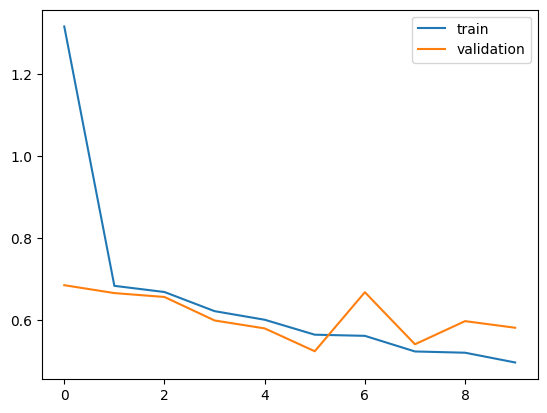

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [ ]:


# Creating CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Fourth convolutional layer
model.add(Conv2D(256, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten the 3D output to 1D
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 13,276,865 (50.65 MB)

 Trainable params: 13,275,905 (50.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 91ms/step - accuracy: 0.5698 - loss: 1.3563 - val_accuracy: 0.7150 - val_loss: 0.5543
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 94ms/step - accuracy: 0.7322 - loss: 0.5351 - val_accuracy: 0.6708 - val_loss: 0.6307
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.7984 - loss: 0.4469 - val_accuracy: 0.7868 - val_loss: 0.4602
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.8478 - loss: 0.3538 - val_accuracy: 0.8346 - val_loss: 0.4809
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8932 - loss: 0.2569 - val_accuracy: 0.8722 - val_loss: 0.3245
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.9300 - loss: 0.1776 - val_accuracy: 0.8784 - val_loss: 0.3970
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.9592 - loss: 0.1077 - val_accuracy: 0.8890 - val_loss: 0.4097
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.9727 - loss: 0.0800 - 

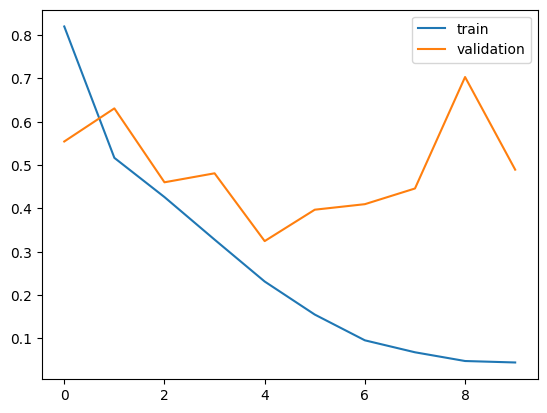

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

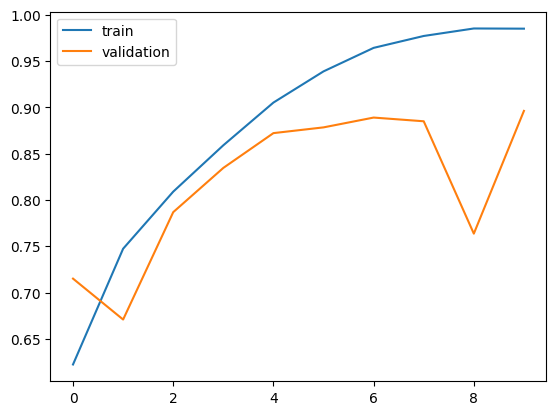

In [ ]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.legend()
plt.show()

In [15]:
# Data Augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)



In [16]:
train_generator = train_datagen.flow_from_directory(
    directory = '/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    directory = '/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 294s 445ms/step - accuracy: 0.7378 - loss: 0.5548 - val_accuracy: 0.8920 - val_loss: 0.2887
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4083
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 308s 450ms/step - accuracy: 0.8585 - loss: 0.3460 - val_accuracy: 0.8912 - val_loss: 0.2678
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 100us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1444
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 279s 443ms/step - accuracy: 0.8693 - loss: 0.3023 - val_accuracy: 0.9131 - val_loss: 0.2142
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3524
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 282s 447ms/step - accuracy: 0.8799 - loss: 0.2801 - val_accuracy: 0.9177 - val_loss: 0.2022
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 109us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3008
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 278s 440ms/step - accurac

In [ ]:
# Evaluating the model
eval_result = model.evaluate(validation_generator)
print("Validation Loss:", eval_result[0])
print("Validation Accuracy:", eval_result[1])


157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9204 - loss: 0.1958
Validation Loss: 0.19484055042266846
Validation Accuracy: 0.9200000166893005


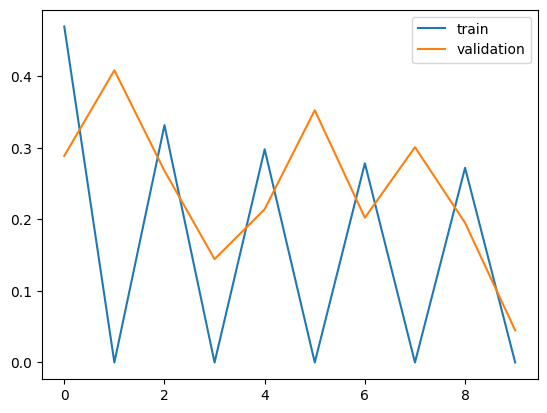

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

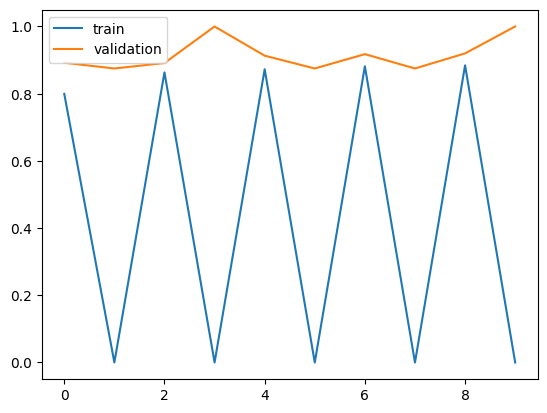

In [ ]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.legend()
plt.show()

In [13]:


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the model
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=320,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 169s 470ms/step - accuracy: 0.6641 - loss: 0.6024 - val_accuracy: 0.8771 - val_loss: 0.2842
Epoch 2/30
305/320 ━━━━━━━━━━━━━━━━━━━━ 6s 423ms/step - accuracy: 0.8214 - loss: 0.3865

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


320/320 ━━━━━━━━━━━━━━━━━━━━ 144s 452ms/step - accuracy: 0.8218 - loss: 0.3859 - val_accuracy: 0.8948 - val_loss: 0.2376
Epoch 3/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 162s 466ms/step - accuracy: 0.8487 - loss: 0.3457 - val_accuracy: 0.9229 - val_loss: 0.2004
Epoch 4/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 136s 426ms/step - accuracy: 0.8636 - loss: 0.3121 - val_accuracy: 0.9179 - val_loss: 0.1982
Epoch 5/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 186s 466ms/step - accuracy: 0.8693 - loss: 0.3042 - val_accuracy: 0.9250 - val_loss: 0.1781
Epoch 6/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 136s 426ms/step - accuracy: 0.8649 - loss: 0.3085 - val_accuracy: 0.9222 - val_loss: 0.1990
Epoch 7/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 185s 465ms/step - accuracy: 0.8730 - loss: 0.2984 - val_accuracy: 0.9302 - val_loss: 0.1756
Epoch 8/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 137s 428ms/step - accuracy: 0.8706 - loss: 0.2868 - val_accuracy: 0.9307 - val_loss: 0.1807
Epoch 9/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 185s 466ms/step - accuracy: 0.8771 - loss: 0.28

In [19]:
# Evaluating the model
eval_result = model.evaluate(validation_generator)
print("Validation Loss:", eval_result[0])
print("Validation Accuracy:", eval_result[1])


157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 149ms/step - accuracy: 0.9293 - loss: 0.1718
Validation Loss: 0.16616246104240417
Validation Accuracy: 0.932200014591217


In [ ]:
model.save('cat_vs_dog_model.h5')

In [ ]:
test_img_dog = cv2.imread('/content/dog.jpg')
test_img_cat = cv2.imread('/content/cat.jpg')

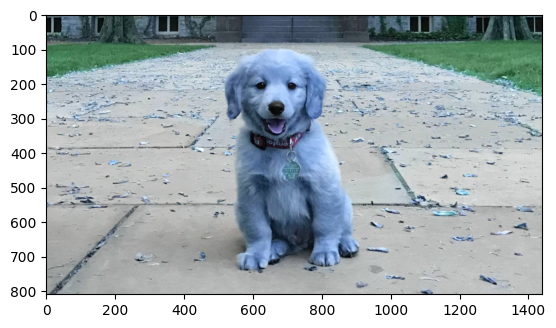

In [ ]:
plt.imshow(test_img_dog)

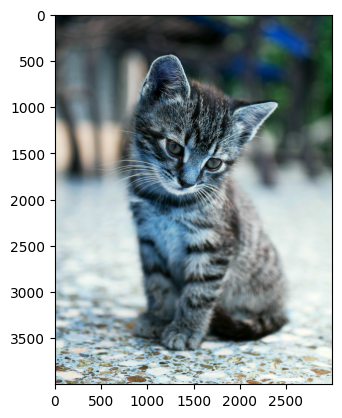

In [ ]:
plt.imshow(test_img_cat)

In [ ]:
test_img_dog = cv2.resize(test_img_dog, (256,256))
test_img_cat = cv2.resize(test_img_cat , (256,256))

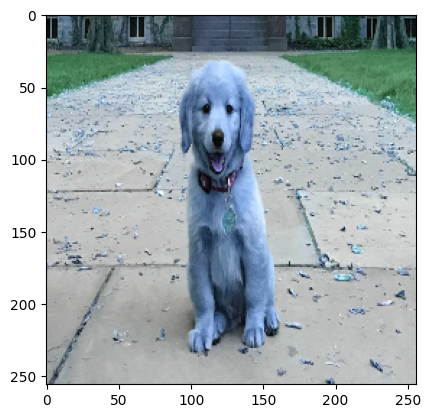

In [ ]:
plt.imshow(test_img_dog)

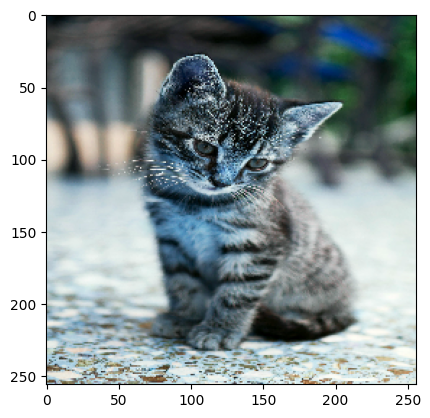

In [ ]:
plt.imshow(test_img_cat)

In [ ]:
test_img_dog = cv2.resize(test_img_dog, (224, 224))
test_input = test_img_dog.reshape((1, 224, 224, 3))
model.predict(test_input)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img_cat = cv2.resize(test_img_cat, (224, 224))
test_input = test_img_cat.reshape((1, 224, 224, 3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.]], dtype=float32)